<p align="center">
<FONT FACE="times new roman" SIZE=5>
<br>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png"
width="250" height="250">
</img>
<br>
<i><b>Docente:</b> Juan Sebastian Malagón</i>
<br>
<i><b>Asignatura:</b> Redes Neuronales </i>
<br>
<i><b>Estudiantes:</b> <br> Chiara Vivian Valenzuela Losada <br> Andrea Carolina Terraza Sequea</i>
<br>
<i><b>Tema:</b> El perceptron multicapa</i>
<br>
<i>09/10/2023</i>
</FONT>
</p>



Importamos librerías:

In [ ]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Reshape
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#1. Cargue el conjunto de datos MNIST

Use KERAS para cargar el conjunto de datos MNIST, una vez cargado añada ruido aleatorio, tanto en el conjunto de entrenamiento como el de validación. Deberá obtener cuatro conjuntos: entrenamiento+ruido, test+ruido, entrenamiento simple y test simple.

Muestre un ejemplo para cada una de las etiquetas con y sin ruido (Tómelos del conjunto de entrenamiento).

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:

x_train_noisy = []
x_test_noisy = []

# Ruido al conjunto de train
for image in x_train:
    #Ruido Gaussiano
    noise = np.random.normal(0,1,image.shape).astype('uint8')
    x_train_noisy.append(noise + image)

# Ruido al conjuto de test
for image in x_test:
    noise = np.random.normal(0,1,image.shape).astype('uint8')
    x_test_noisy.append(noise + image)

x_train_noisy = np.array(x_train_noisy)
x_test_noisy = np.array(x_test_noisy)


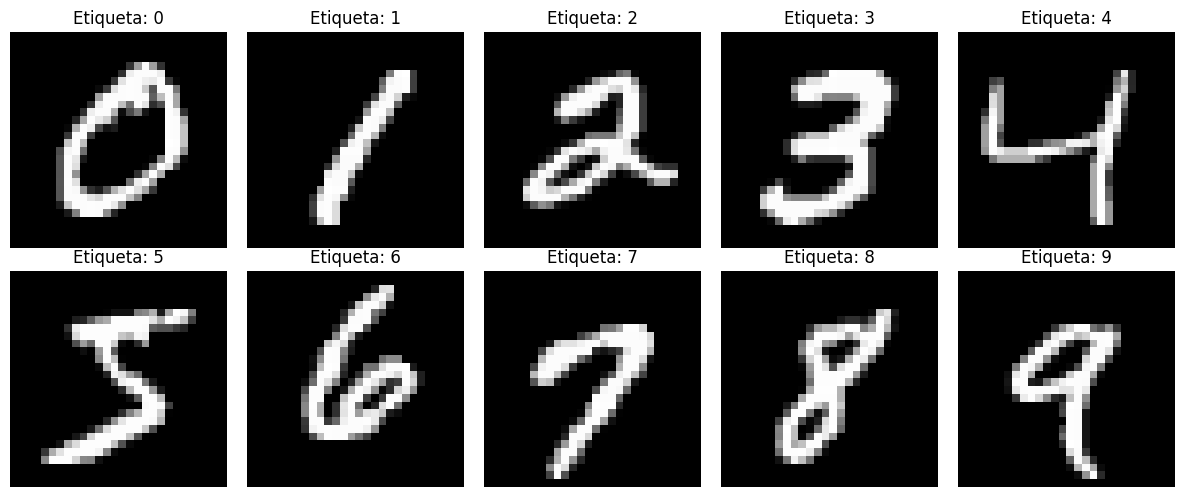

In [ ]:
representative_images_noisy = []
representative_images_simple = []

for i in range(10):
    representative_image_noisy = x_train_noisy[y_train == i][0]
    representative_images_noisy.append(representative_image_noisy)

    representative_image_simple = x_train[y_train == i][0]
    representative_images_simple.append(representative_image_simple)

# Hacer el plot imagenes sin ruido
fig, axs = plt.subplots(2, 5, figsize=(12, 5))
axs = axs.flatten()

for i in range(10):
    axs[i].imshow(representative_images_simple[i], cmap='gray')
    axs[i].set_title(f'Etiqueta: {i}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

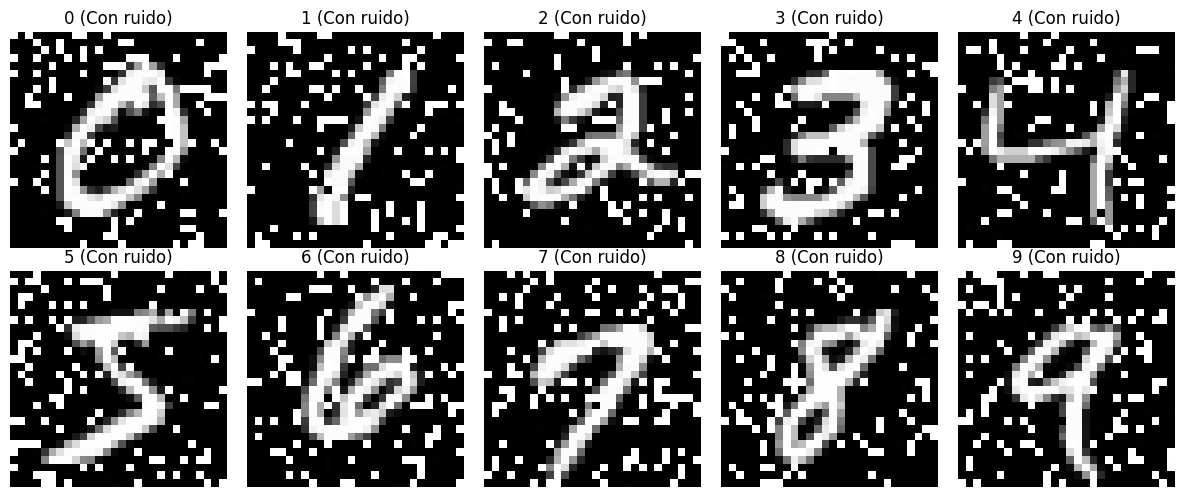

In [ ]:
# Hacer el plot imagenes con ruido
fig, axs = plt.subplots(2, 5, figsize=(12, 5))
axs = axs.flatten()

for i in range(10):
    axs[i].imshow(representative_images_noisy[i], cmap='gray')
    axs[i].set_title(f'{i} (Con ruido)')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

# 2. Proponga una estructura neuronal

En este caso, construirá una red neuronal que sea capaz de limpiar nuestras imágenes. Por lo cual, los conjuntos con ruido serán los datos de entrada y las imágenes limpias la salida. Tomando esto en consideración, proponga una estructura neuronal capaz de realizar dicha tarea.

**Pistas:**


1.   Recuerde aplanar las imágenes usando reshape o una capa de flatten.
2.   Recuerde que la entrada como la salida serán vectores de 784.
3.   La capa intermedia deberá tener menos neuronas que la de entrada y salida.
4.   Piense si esto es una tarea de clasificación o de regresión para que pueda seleccionar adecuadamente la función de coste.
4.   Deberá realizar pruebas para determinar las características de la red neuronas (regularizaciones, valores de learning rate. )




In [ ]:
model = Sequential()

# Capa de entrada: aplanar la imagen con ruido (784 valores)
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(100, activation='relu'))  # Capa intermedia
model.add(Dense(50, activation='relu'))  # Capa intermedia
model.add(Dense(100, activation='relu'))  # Capa intermedia
model.add(Dense(784, activation='sigmoid')) #Capa salida

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=1e-3), metrics=['mae'])

# 3. Entrena la red neuronal y demuestre su desempeño

Entre la red neuronal y demuestre el desempeñó. Justifique su elección tanto de función de perdida como de métrica de evaluación. Adicionalmente, muestre los resultados obtenidos para el conjunto de test (recuerde convertir su vector de 784 a una imagen de 28x28).

In [ ]:
# Entrenar el modelo
np.clip(x_train_noisy,0,1,out=x_train_noisy)
history = model.fit(x_train_noisy, x_train.reshape([60000,784])/255, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 7ms/step - loss: 0.0375 - mae: 0.0924
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0248 - mae: 0.0660
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0222 - mae: 0.0604
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0209 - mae: 0.0576
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0200 - mae: 0.0555
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0193 - mae: 0.0540
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0188 - mae: 0.0530
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0185 - mae: 0.0523
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0182 - mae: 0.0517
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0180 - mae: 0.0513


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_noisy, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 26.4849 - mae: 4.2843


In [ ]:
print(f'Pérdida en el conjunto de prueba: {test_loss}')
print(f'Precisión en el conjunto de prueba: {test_accuracy}')

Pérdida en el conjunto de prueba: 26.484880447387695
Precisión en el conjunto de prueba: 4.284327507019043


313/313 [==============================] - 1s 3ms/step


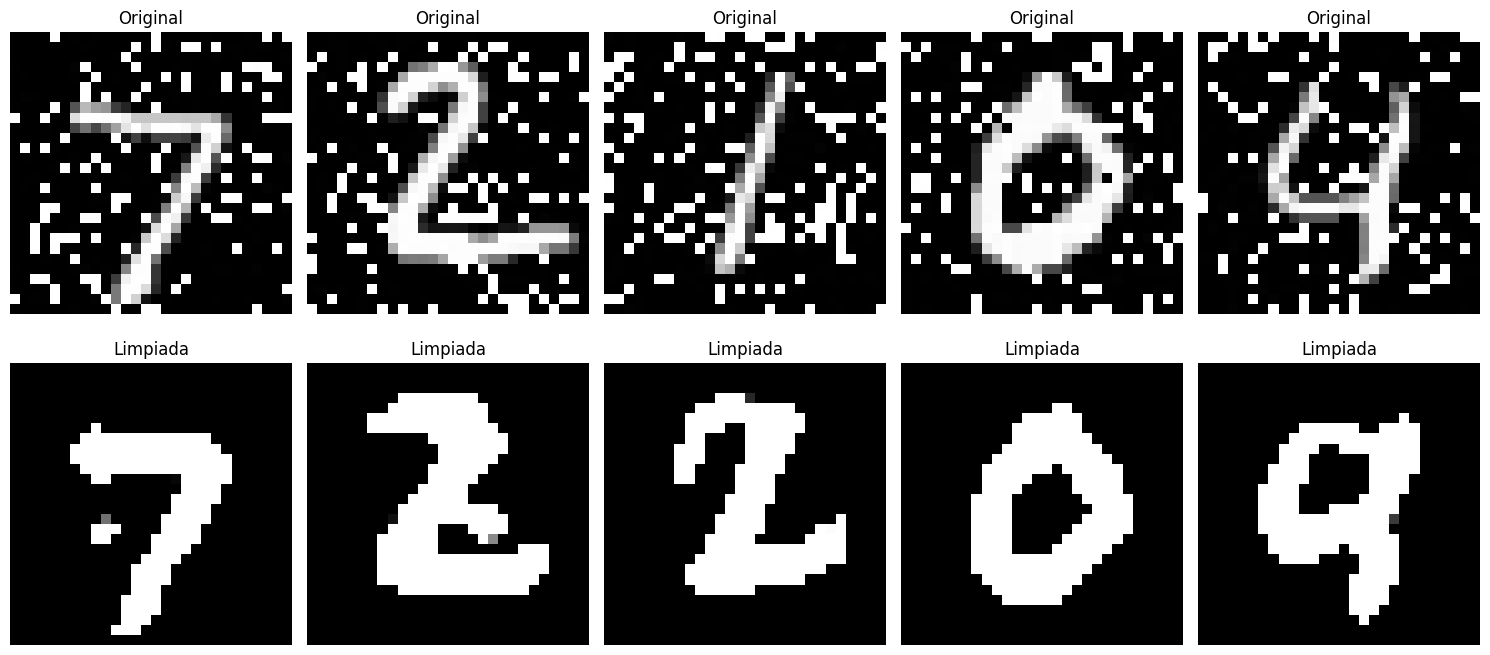

In [ ]:
# Obtener predicciones en el conjunto de prueba
predictions = model.predict(x_test_noisy)

# Mostrar ejemplos de imágenes con ruido y las predicciones
n = 5  # Número de ejemplos a mostrar
plt.figure(figsize=(15, 7))

for i in range(n):
    # Convertir el vector de 784 a una imagen de 28x28
    original_image = x_test_noisy[i].reshape(28, 28)
    predicted_image = predictions[i].reshape(28, 28)

    # Plotear imágenes
    plt.subplot(2, n, i + 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(2, n, i + n + 1)
    plt.imshow(predicted_image, cmap='gray')
    plt.title('Limpiada')
    plt.axis('off')

plt.tight_layout()
plt.show()

##Justificación
1. **Función de Pérdida:** La función de pérdida 'mean_squared_error' se ha seleccionado para este problema de restauración de imágenes debido a su alineación con el objetivo central: minimizar la discrepancia entre las imágenes originales y las imágenes restauradas. Esta función penaliza de manera efectiva las diferencias cuadráticas entre los píxeles en las imágenes, lo que resulta en una medida coherente y precisa para evaluar el rendimiento de la red neuronal en la tarea de restauración.

2. **Métrica de Evaluación:** La elección de 'mae' como métrica de evaluación se fundamenta en su capacidad para proporcionar una medida interpretable y robusta del rendimiento del modelo. Calcula el promedio de las diferencias absolutas entre las predicciones y los valores reales, lo que brinda una comprensión directa de cuánto se desvían en promedio las predicciones del modelo de las respuestas reales.

# 4. Extraiga la representación

Recuerde que la capa intermedia DEBE tener un tamaño menor a las capas de entrada y de salida. Extraiga los valores de dicha capa para cada una de las imágenes. Use una técnica de reducción de dimensionalidad (PSA, TSNE ...) y observe un diagrama de dispersión de la representación neuronal etiquetado con cada una de las clases del conjunto de datos.

In [ ]:
# Crear un nuevo modelo que toma como entrada la capa intermedia
intermediate_layer_model = Model(inputs=model.input, outputs=model.layers[4].output)  # Cambia el índice según la capa intermedia

# Obtener las representaciones intermedias para el conjunto de prueba
intermediate_representation = intermediate_layer_model.predict(x_test_noisy)

313/313 [==============================] - 1s 3ms/step


In [ ]:
# Reducción de dimensionalidad utilizando t-SNE
tsne = TSNE(n_components=2)
reduced_representation = tsne.fit_transform(intermediate_representation)

In [ ]:
# Etiquetar las representaciones reducidas con las clases del conjunto de prueba
labels = y_test

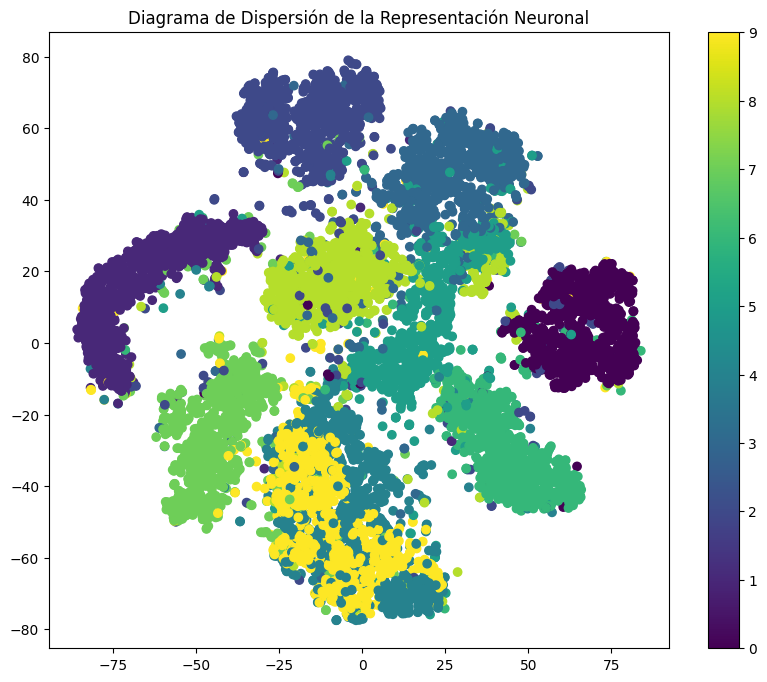

In [ ]:
# Crear un diagrama de dispersión etiquetado con las clases
plt.figure(figsize=(10, 8))
plt.scatter(reduced_representation[:, 0], reduced_representation[:, 1], c=labels, cmap='viridis')
plt.colorbar()
plt.title('Diagrama de Dispersión de la Representación Neuronal')
plt.show()